In [715]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
sns.set(rc={'figure.figsize': (20,3)})
%matplotlib inline
columns=['id', 'name','host_id','host_name', 'host_since', 'host_is_superhost',  'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
         'latitude', 'longitude','property_type','room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews',
         'review_scores_rating']
listings=pd.read_csv('listings.csv.gz',usecols=columns)
listings['host_since']=pd.to_datetime(listings['host_since'])
listings['price']=listings.price.str.replace('$', '')
listings['price']=listings.price.str.replace(',','')
listings['price']=listings.price.astype(float)
listings.host_since.bfill(axis='rows',inplace=True)
listings['year']=listings.host_since.dt.year
listings['year']=pd.to_numeric(listings['year'])
listings['host_is_superhost']=listings['host_is_superhost'].str.replace('f','No')
listings['host_is_superhost']=listings['host_is_superhost'].str.replace('t','Yes')
listings.head(3)

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,year
0,11156,An Oasis in the City,40855,Colleen,2009-09-23,No,1.0,Elizabeth Bay/Rushcutters Bay,Sydney,Potts Point,2011,-33.86917,151.22656,Apartment,Private room,1,64.0,2,180,364,196,92.0,2009
1,12351,Sydney City & Harbour at the door,17061,Stuart,2009-05-14,No,2.0,Pyrmont,Sydney,Pyrmont,2009,-33.86515,151.19190,Townhouse,Private room,2,14314.0,2,7,0,526,95.0,2009
2,14250,Manly Harbour House,55948,Heidi,2009-11-20,Yes,2.0,Balgowlah,Manly,Balgowlah,2093,-33.80093,151.26172,House,Entire home/apt,6,471.0,5,22,173,2,90.0,2009


In [ ]:
listings.loc[listings['host_id'] == 160367641, 'name']='Justine'
listings.loc[listings['host_id'] == 162420812, 'name']='Ensuite room, swimming pool and private bathtub.'
listings.loc[listings['host_id'] == 170637735, 'name']='Inna'
listings.loc[listings['host_id'] == 23051339, 'name']='Julia'
listings.loc[listings['host_id'] == 214013074, 'name']='Protais'
listings.loc[listings['host_id'] == 61483601, 'name']='Pawel'
listings.loc[listings['host_id'] == 110189423, 'name']='Corey'
listings.loc[listings['host_id'] == 175969320, 'name']='Alejandro'
listings.loc[listings['host_id'] == 298967025, 'name']='Tsoom'

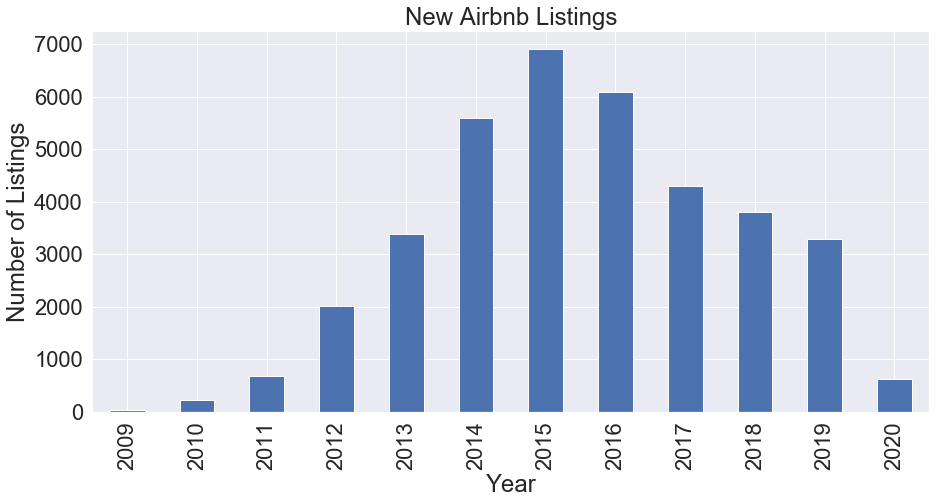

In [890]:
# listings.year.value_counts(ascending=True)
sns.set(font_scale=2)  # crazy big
listings.year.value_counts().sort_index().plot(kind='bar', label='big')
plt.title('New Airbnb Listings')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
# listings.year.dtypes
sns.set(style="whitegrid")
plt.savefig('New Airbnb Listings.jpg')


# The number  of new listings increases till 2015, and it decreases back after 2015, where 2019 had the same of number of new listings as 2013, which is not a good sign. 

In [821]:
listings.year.count()

36901

Text(0, 0.5, 'Number of Listings')

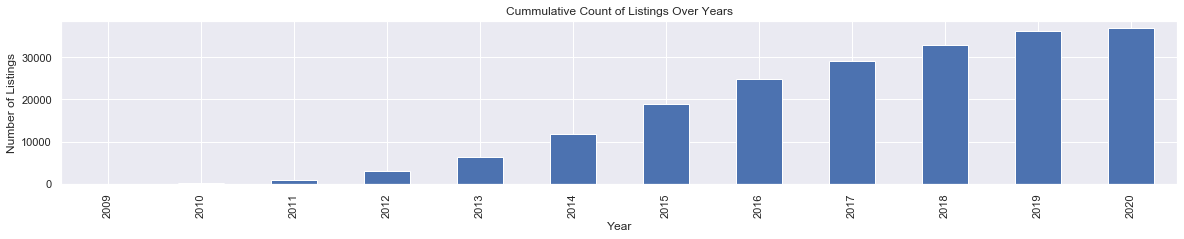

In [653]:
# listings.host_since.bfill(axis='rows',inplace=True)
listings.year.value_counts(ascending=True).sort_index().cumsum().plot(kind='bar')
plt.title('Cummulative Count of Listings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Listings')


In [812]:

# listings.year.value_counts(ascending=True).sort_index().plot()


In [813]:
listings.host_since.dtype
# listings.info()

dtype('<M8[ns]')

In [583]:
# listings.host_total_listings_count.unique()
# listings[['host_listings_count', 'host_total_listings_count']][]
# listings[['number_of_reviews', 'review_scores_rating']]
# # listings[listings['host_listings_count'] == listings['host_total_listings_count']].shape# listings.h# listings.host_since.min()
# listings.host_since.min()
# listings.host_since.max()
# listings.instant_bookable.value_counts()
# listings.shape
# listings['host_since'].dt.year
# listings.review_scores_rating.isnull().sum()
# listings.bed_type.value_counts()
# listings.price.dtypes
# listings.price.isnull().sum()
# listings.neighbourhood.unique()
# listings.neighbourhood_cleansed.isnull().sum()
# listings[listings.host_since.isnull()]
# reviews=listings.groupby('year')['number_of_reviews'].sum()
# listings.groupby('year')['number_of_reviews'].sum().plot(kind='bar')
# bookings.sum(), listings.number_of_reviews.sum()
# sns.barplot(listings.neighbourhood_cleansed,listings.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False),
#             data=listings) 
# listings.host_is_superhost.unique()
# listings.host_is_superhost.value_counts(dropna=False)
# listings[listings.host_is_superhost.isnull()]
# listings[listings['price']<1000].shape
# sns.barplot(listings['year'], listings['number_of_reviews'], data=listings, ci=False, estimator=np.sum )
# reviews=listings.groupby('year')['number_of_reviews'].sum()
# # listings.groupby('year')['number_of_reviews'].sum().plot(kind='bar')
# bookings=listings.groupby('year')['number_of_reviews'].sum()
# bookings =bookings * 2
# # bookings.sum(), listings.number_of_reviews.sum()
# listings.number_of_reviews.plot(kind='box')

In [584]:
host_id_count=listings.host_id.value_counts()
unique_hosts=len(host_id_count)
single_listings=host_id_count[host_id_count==1].count()
multi_listings=len(listings.host_id) - single_listings
# len(listings.host_id), unique_hosts, multi_listings, single_listings
percentages=[round(multi_listings/len(listings.host_id)*100,0),round(single_listings/len(listings.host_id)*100,0)]
percentages
# [multi_listings, single_listings]

[13772, 23129]

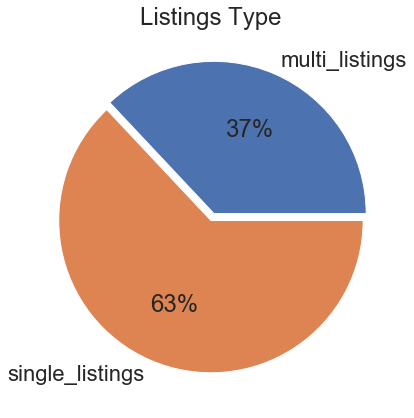

In [887]:
sns.set(font_scale=2)  # crazy big

plt.pie(percentages, labels=['multi_listings', 'single_listings'],autopct='%1.0f%%',explode=[0.05,0], rotatelabels=False)
plt.title('Listings Type')
plt.savefig('Listings Types')

Text(0.5, 1.0, 'Counts of Listings By Property Type')

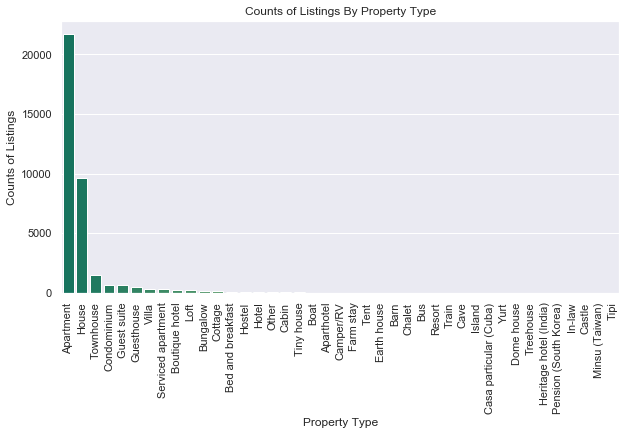

In [827]:
listings.columns
sns.set(rc={'figure.figsize': (10,5)})

ax1=sns.countplot(listings['property_type'], data=listings, order=listings['property_type'].value_counts().index,
                  palette='summer', orient='v')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Property Type')
ax1.set_ylabel('Counts of Listings')
ax1.set_title('Counts of Listings By Property Type')


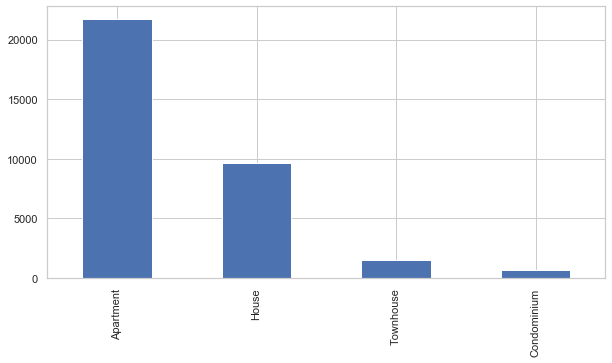

In [872]:
listings.property_type.value_counts().head(4).plot(kind='bar')

Text(0.5, 1.0, 'Counts of Listings By Room Type')

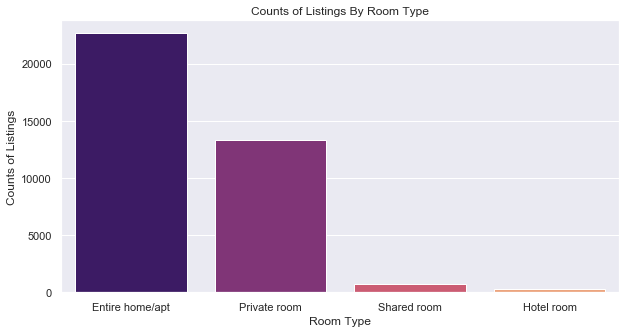

In [791]:
listings.columns
ax1=sns.countplot(listings['room_type'], data=listings, order=listings['room_type'].value_counts().index,
                  palette='magma', orient='v')
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Counts of Listings')
ax1.set_title('Counts of Listings By Room Type')


In [590]:
listings.property_type.unique()

array(['Apartment', 'Townhouse', 'House', 'Loft', 'Guest suite',
       'Bungalow', 'Condominium', 'Guesthouse', 'Cabin', 'Cottage',
       'Bed and breakfast', 'Serviced apartment', 'Villa',
       'Boutique hotel', 'Farm stay', 'Castle', 'Camper/RV', 'Other',
       'Dome house', 'Tiny house', 'Tipi', 'Tent', 'Hostel', 'Boat',
       'Train', 'Island', 'Chalet', 'Hotel', 'Resort', 'Barn',
       'Earth house', 'Yurt', 'Aparthotel', 'In-law', 'Cave',
       'Heritage hotel (India)', 'Minsu (Taiwan)',
       'Casa particular (Cuba)', 'Treehouse', 'Bus',
       'Pension (South Korea)'], dtype=object)

In [815]:
# listings.neighbourhood_cleansed.unique()
# nc=listings.neighbourhood_cleansed.value_counts()
# nc.plot(kind='bar', color='#D3212D')
# fig, ax=plt.subplots()
# ax=sns.barplot(listings['neighbourhood_cleansed'], listings['host_id'],data=listings, ci=False, color='#D374B7')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Counts of Listings By Neighbourhood')

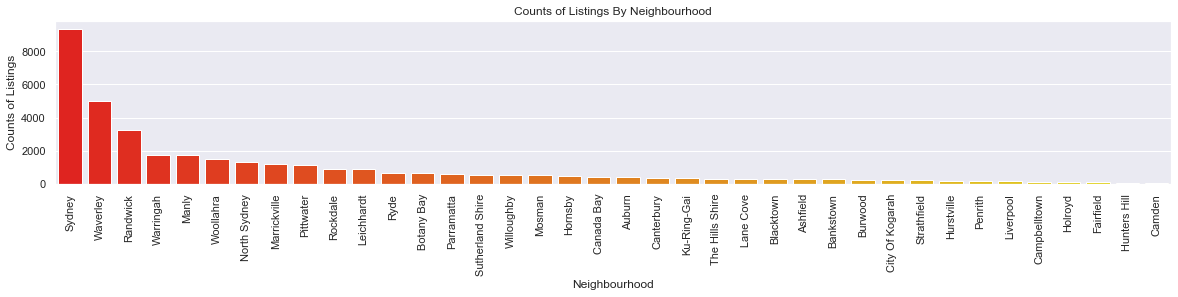

In [655]:
# sns.barplot(listings.neighbourhood_cleansed,listings.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False),
#             data=listings) 
ax1=sns.countplot(listings['neighbourhood_cleansed'], data=listings, order=listings['neighbourhood_cleansed'].value_counts().index,
                  palette='autumn', orient='v')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Counts of Listings')
ax1.set_title('Counts of Listings By Neighbourhood')

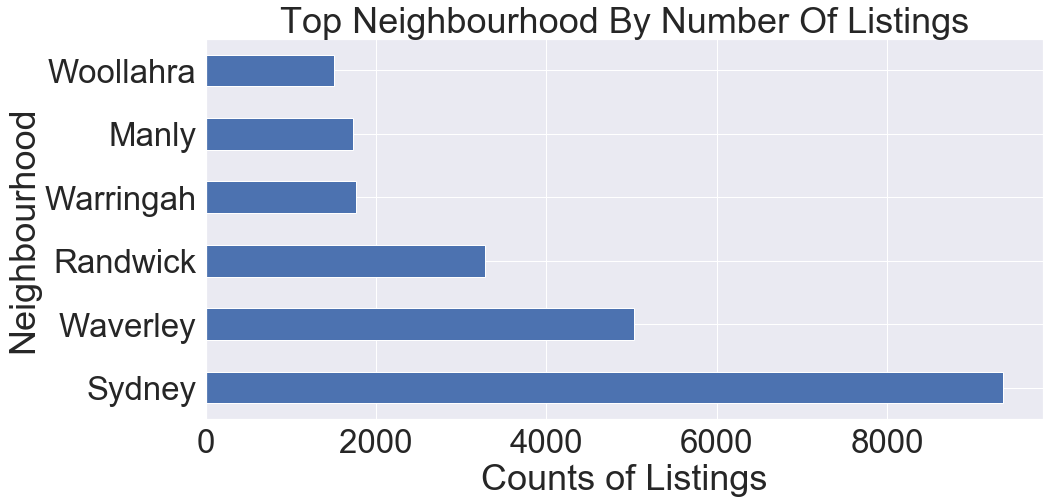

In [900]:
sns.set(font_scale=3)  # crazy big
listings['neighbourhood_cleansed'].value_counts().head(6).plot(kind='barh')
plt.ylabel('Neighbourhood')
plt.xlabel('Counts of Listings')
plt.title('Top Neighbourhood By Number Of Listings')
plt.savefig('Top neighbourhood by the number of listings')

#This six neighbourhood makes 60% of all the listings in Sydney, so it is better to start with these neighbourhoods. 

In [675]:
# sns.countplot(listings['host_is_superhost'], hue=listings['year'])
# sns.countplot(listings['year'], hue=listings['host_is_superhost'], data=listings)

Text(0.5, 1.0, 'Host Hospitality')

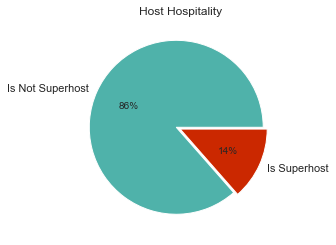

In [678]:
plt.pie(listings['host_is_superhost'].value_counts(),colors=[ '#4fb2aa', '#cb2800'], labels=['Is Not Superhost','Is Superhost'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)
plt.title('Host Hospitality')

In [597]:
listings.groupby('host_is_superhost')[['review_scores_rating','number_of_reviews']].mean()

,review_scores_rating,number_of_reviews
host_is_superhost,,
No,92.160377,9.269072
Yes,97.220328,50.685245


Text(0.5, 1.0, 'Average Number of Reviews by Hospitality ')

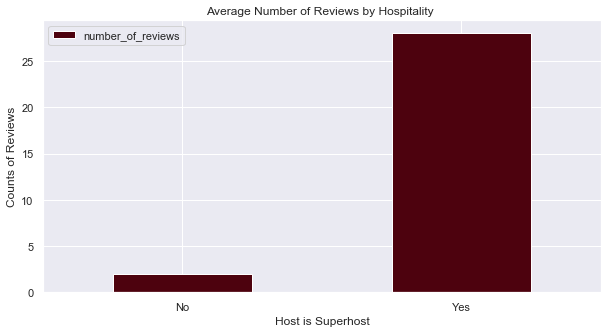

In [795]:
from matplotlib.figure import Figure
fig.set_size_inches(1000, 1000)
ax2=listings.groupby('host_is_superhost')[['number_of_reviews']].median().plot(kind='bar', color='#4D020E')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0)
ax2.set_xlabel('Host is Superhost')
ax2.set_ylabel('Counts of Reviews')
ax2.set_title('Average Number of Reviews by Hospitality ')

In [599]:
listings.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'year'],
      dtype='object')

In [600]:
listings.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,year
count,3.690100e+04,3.690100e+04,36894.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,25474.000000,36901.000000
mean,2.453288e+07,9.131863e+07,21.889413,-33.863215,151.198786,3.330994,227.003333,6.106257,680.831793,95.462697,14.866995,93.092840,2015.540609
std,1.228760e+07,9.191494e+07,211.355058,0.072964,0.088700,2.188423,443.456850,27.658358,530.865604,129.994717,36.144464,10.753855,2.145092
min,1.115600e+04,1.409300e+04,0.000000,-34.135590,150.601470,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,2009.000000
25%,1.499574e+07,1.828597e+07,1.000000,-33.899450,151.175530,2.000000,79.000000,1.000000,30.000000,0.000000,0.000000,90.000000,2014.000000
50%,2.379250e+07,5.116167e+07,1.000000,-33.882000,151.213460,2.000000,130.000000,2.000000,1125.000000,0.000000,2.000000,97.000000,2015.000000
75%,3.577880e+07,1.506891e+08,3.000000,-33.829520,151.258910,4.000000,220.000000,5.000000,1125.000000,178.000000,11.000000,100.000000,2017.000000
max,4.373676e+07,3.492491e+08,3055.000000,-33.390750,151.339870,16.000000,15000.000000,1125.000000,10000.000000,365.000000,657.000000,100.000000,2020.000000


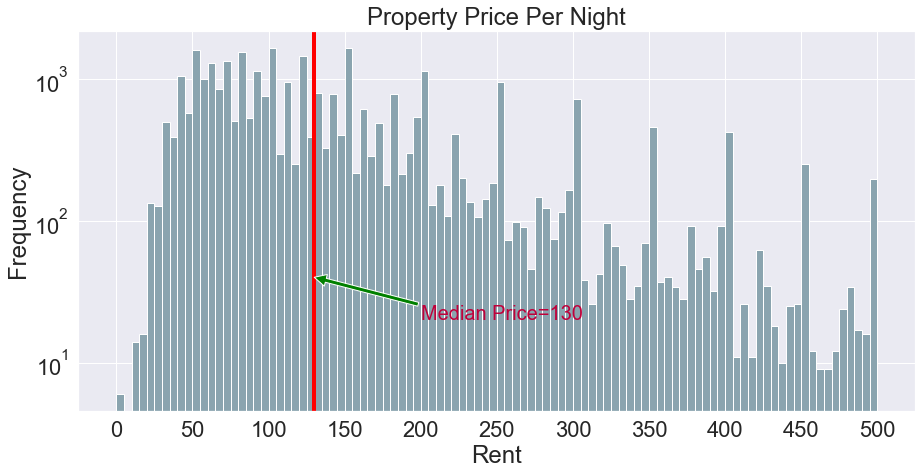

In [893]:
# listings[listings['price']<500].shape[0]/len(listings['price']) * 100
sns.set(font_scale=2)
plt.hist(listings['price'], log=True, bins=100, range=(0,500), color='#8aa4af') # 92% of the prices lies between 0-500$
plt.title('Property Price Per Night')
median_price=listings['price'].median()
plt.axvline(median_price, color='red', linewidth=4)
plt.xticks(list(range(0,501,50)))
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.annotate('Median Price=130',fontsize=20,xy=(130,40),xytext = (200, 20), color='#c0003a',arrowprops = {'facecolor' : 'green'})
plt.savefig('Property Price per night')

# 92% of the prices lies between 0-500$, and median rent for a property is 130$. The rents should circle around this figure. 


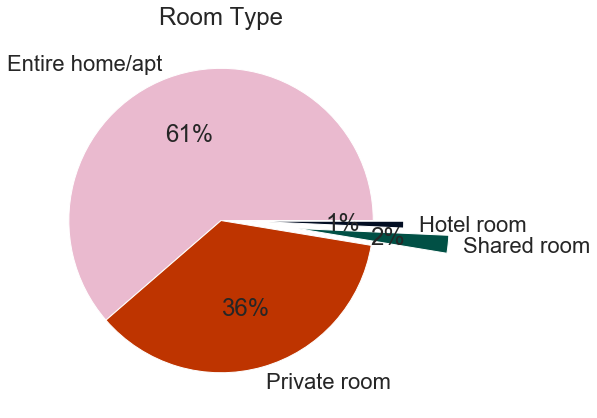

In [896]:
sns.set(rc={'figure.figsize': (15,7)})
sns.set(font_scale=2)
listings.room_type.value_counts().index
# sns.barplot(listings['room_type'],listings['room_type'].index,  data=listings, ci=False)
# sns.countplot(listings['room_type'],  data=listings)
plt.pie(listings['room_type'].value_counts(), labels=[ 'Entire home/apt', 'Private room','Shared room', 'Hotel room'],data=listings, 
        autopct='%1.0f%%',explode=[0,0,0.5,0.2],colors=['#eabacf', '#be3400', '#015045','#020d22'])
plt.title('Room Type')
plt.savefig('Room Type1')


# The company should focus on Entire home/apt and Private room for the moment. 

In [868]:
listings.room_type.value_counts()

Entire home/apt    22641
Private room       13298
Shared room          698
Hotel room           264
Name: room_type, dtype: int64

In [650]:
listings.groupby('year')['number_of_reviews'].sum()

year
2009      1680
2010      4708
2011     17788
2012     47380
2013     69559
2014     89119
2015    101214
2016     89386
2017     61411
2018     43322
2019     22270
2020       770
Name: number_of_reviews, dtype: int64

In [664]:
listings.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'year'],
      dtype='object')

In [682]:
listings.groupby('year').price.mean()

year
2009    1126.774194
2010     317.742358
2011     197.393225
2012     250.945165
2013     230.711197
2014     242.000537
2015     208.203071
2016     198.794113
2017     174.720540
2018     286.021859
2019     263.007594
2020     243.513600
Name: price, dtype: float64

In [683]:
listings.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'year'],
      dtype='object')

In [685]:
listings.host_id.value_counts()>10

194230296     True
7409213       True
15469257      True
235137306     True
15739069      True
             ...  
146994663    False
28953709     False
21424933     False
346438771    False
60166146     False
Name: host_id, Length: 26947, dtype: bool

Text(0.5, 0, 'Number of Properties')

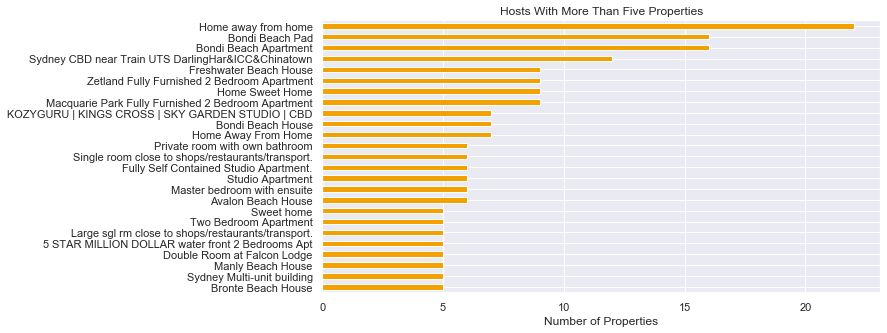

In [817]:
listings.name.value_counts().head(25).sort_values().plot(kind='barh', color='#f3a001',sort_columns=False)
plt.title('Hosts With More Than Five Properties')
plt.xlabel('Number of Properties')

In [770]:
list(reversed(listings.name.value_counts().head(17)))

[6, 6, 6, 6, 6, 6, 7, 7, 7, 9, 9, 9, 9, 12, 16, 16, 22]

In [775]:
listings.name.value_counts().head(17).sort_values()

Avalon Beach House                                     6
Studio Apartment                                       6
Fully Self Contained Studio Apartment.                 6
Single room close to shops/restaurants/transport.      6
Private room with own bathroom                         6
Master bedroom with ensuite                            6
Home Away From Home                                    7
Bondi Beach House                                      7
KOZYGURU | KINGS CROSS | SKY GARDEN STUDIO | CBD       7
Home Sweet Home                                        9
Zetland Fully Furnished 2 Bedroom Apartment            9
Freshwater Beach House                                 9
Macquarie Park Fully Furnished 2 Bedroom Apartment     9
Sydney CBD near Train UTS DarlingHar&ICC&Chinatown    12
Bondi Beach Apartment                                 16
Bondi Beach Pad                                       16
Home away from home                                   22
Name: name, dtype: int64

In [806]:
# listings.loc[listings['name'] == 'Home away from home' , ['name','host_id','host_name']].shape
# listings.name
# listings.loc[listings['name'] == 'Home away from home' , ['name', 'price']]
listings.host_id.value_counts()
listings


194230296    176
7409213      149
15469257     142
235137306    131
15739069     109
            ... 
146994663      1
28953709       1
21424933       1
346438771      1
60166146       1
Name: host_id, Length: 26947, dtype: int64

In [876]:
# listings.iloc[listings.index(16643),'name']
# listings.iloc[194230296, 'name']